In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
img = cv.imread('./material_TPs/TP3/eyes.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = cv.medianBlur(gray,5)

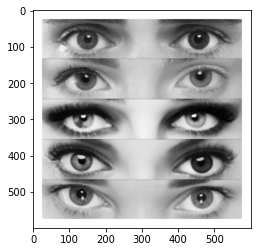

In [5]:
plt.figure()
plt.imshow(gray,cmap='gray', vmin=0, vmax=255)
plt.show()

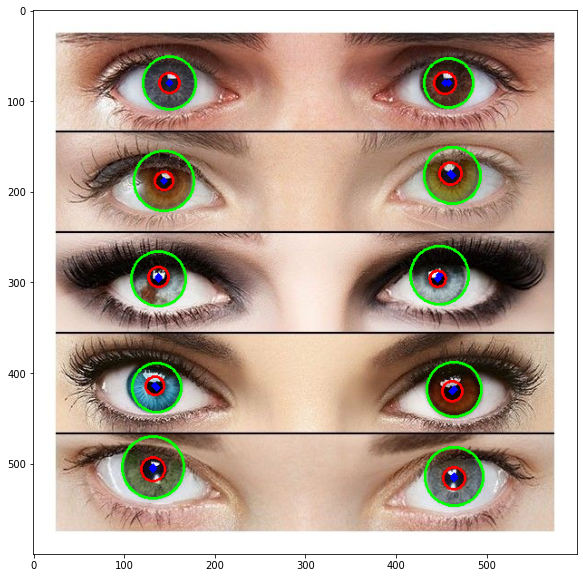

In [53]:
img_out = img.copy()

iris = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,minDist=10,param1=100,param2=40,minRadius=10,maxRadius=50)
pupils = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,minDist=50,param1=165,param2=17,minRadius=9,maxRadius=19)

iris = np.uint16(np.around(iris))
pupils = np.uint16(np.around(pupils))

for i in iris[0,:]:
    cv.circle(img_out,(i[0],i[1]),i[2],(0,255,0),2)
    cv.circle(img_out,(i[0],i[1]),2,(255,0,0),3) 
    
for j in pupils[0,:]:
    cv.circle(img_out,(j[0],j[1]),j[2],(0,0,255),2)
    cv.circle(img_out,(j[0],j[1]),2,(255,0,0),3)

img_out = img_out[:,:,[2,1,0]]
plt.figure(figsize = (10,10))
plt.imshow(img_out)
plt.show()

### Distancias entre iris

In [36]:
iris = np.uint16(np.around(iris))
iris

array([[[132, 504,  34],
        [464, 514,  32],
        [150,  80,  29],
        [462, 182,  31],
        [144, 188,  33],
        [464, 418,  30],
        [458,  80,  27],
        [138, 296,  30],
        [448, 292,  32],
        [136, 416,  27]]], dtype=uint16)

In [50]:
distance_iris_1 = iris[0][6][0] - iris[0][2][0]  
distance_iris_2 = iris[0][3][0] - iris[0][4][0] 
distance_iris_3 = iris[0][8][0] - iris[0][7][0]
distance_iris_4 = iris[0][5][0] - iris[0][9][0]  
distance_iris_5 = iris[0][1][0] - iris[0][0][0]

distances_iris = np.array([distance_iris_1, distance_iris_2, distance_iris_3, distance_iris_4, distance_iris_5])
distances_iris

array([308, 318, 310, 328, 332], dtype=uint16)

### Distancias entre pupilas

In [54]:
pupils = np.uint16(np.around(pupilas))
pupils

array([[[464, 516,  12],
        [132, 506,  13],
        [446, 296,   9],
        [454,  80,  12],
        [150,  80,  11],
        [134, 414,  10],
        [460, 180,  12],
        [144, 188,  10],
        [462, 420,  11],
        [138, 294,  11]]], dtype=uint16)

In [56]:
distance_pup_1 = pupils[0][3][0] - pupils[0][4][0]  
distance_pup_2 = pupils[0][6][0] - pupils[0][7][0]  
distance_pup_3 = pupils[0][2][0] - pupils[0][9][0]  
distance_pup_4 = pupils[0][8][0] - pupils[0][5][0]
distance_pup_5 = pupils[0][0][0] - pupils[0][1][0]  

distances_pupils = np.array([distance_pup_1, distance_pup_2, distance_pup_3, distance_pup_4, distance_pup_5])
distances_pupils

array([304, 316, 308, 328, 332], dtype=uint16)

In [57]:
distances_iris == distances_pupils

array([False, False, False,  True,  True])